**Project Title:** German Credit Risk Prediction Model

**Project Submitted by:** John Githaiga Mututu

**Lecture:** Antony Macharia

**School:** Jomo Kenyatta University of Agriculture and Technology

**Coure Name:** Data Science with Python

**Date:** 6/28.2023


**Perspective**

The project was approached with the objective of exploring, processing, and developing a machine learning model using the German Credit Data to predict the risk assessment for loan applicants. The focus was on uncovering valuable relationships between variables, addressing missing values, and preparing the dataset for machine learning algorithms.

**Selected Attributes**

- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others
- Risk (Value target - Good or Bad Risk)

**Objective**

The main objective of the project was to analyze the German Credit Data and apply various preprocessing techniques to optimize the dataset for machine learning. The exploration phase involved identifying relationships between variables and evaluating missing value treatment methods.

During the machine learning phase, several models were implemented, including K-Nearest Neighbors (KNN), Decision Trees (DT), Logistic Regression (LR), Multilayer Perceptrons (MLP), and Support Vector Machines (SVM). Hyper-parameter tuning through cross-validation was performed to enhance the models' performance. The accuracy of each trained model was compared, and the Logistic Regression (LR) model achieved the highest accuracy score, surpassing the alternatives. Other metrics such as F1-Score were also considered and discussed in the project report.

Furthermore, the project aimed to explore the limits of the predictive models by conducting additional testing and analysis.

**Introduction**

The objective of this task is to develop a Machine Learning model capable of accurately predicting the credit risk assessment for a given loan application. As the prediction is binary (good or bad), this task falls under the domain of Binary Classification. The dataset used for this task comprises three numerical variables and six categorical variables, excluding the target column. Combining these distinct variables and uncovering any underlying relationships between them is crucial and equally important for the subsequent steps of the project.


1. Exploratory Data Analysis
2. Data Preprocessing
3. Machine Learning (including Feature Engineering)

#### 1. Exploratory Data Analysis

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

random.seed(42) #used for for reliable randomness / reproducability of the project

In [52]:

sns.set()
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit

In [53]:
germancreditdata = pd.read_csv('german_credit_data.csv') #load data
germancreditdata.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [54]:
germancreditdata.info()  #check dataset details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [55]:
print(f'-----\n{germancreditdata.dtypes.value_counts()}')

-----
object    6
int64     5
Name: count, dtype: int64


In [56]:
germancreditdata.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


**Data Cleaning**

In [57]:
germancreditdata.isna().sum() #check nulls

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [58]:
#fill them with 'Unknown'
germancreditdata['Saving accounts']=germancreditdata['Saving accounts'].fillna('Unknown') 
germancreditdata['Checking account']=germancreditdata['Checking account'].fillna('Unknown')

In [59]:
germancreditdata.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [60]:
# drop "unamed:0" column

germancreditdata.drop(['Unnamed: 0'],axis=1,inplace=True)

germancreditdata.sample(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
444,30,female,3,own,little,moderate,5096,48,furniture/equipment,bad
716,40,male,2,own,Unknown,Unknown,3077,30,radio/TV,good
703,41,male,2,own,moderate,moderate,2503,30,business,good
385,25,female,2,own,little,Unknown,2238,18,radio/TV,good
959,30,male,2,free,moderate,moderate,3069,24,furniture/equipment,good


In [61]:
values=germancreditdata['Purpose'].value_counts() #value count for each category
values

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

In [62]:
names=germancreditdata['Purpose'].unique() 
names

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [63]:
germancreditdata

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,Unknown,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,Unknown,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,Unknown,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,Unknown,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


**Data Visualization**

- Gender Distribution
- Risk Assessment Distribution
- Credit Amount vs Gender
- Numerical Distributions

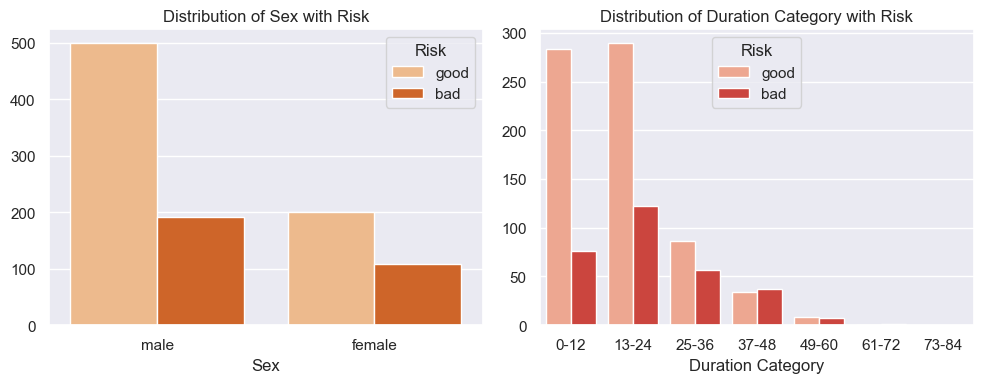

In [64]:

# Define duration categories and labels
duration_bins = [0, 12, 24, 36, 48, 60, 72, 84]
duration_labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72', '73-84']

# Categorize 'Duration' values in the dataset
germancreditdata['Duration Category'] = pd.cut(germancreditdata['Duration'], bins=duration_bins, labels=duration_labels)

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot for categorical variable 'Sex' with 'Risk' as hue
sns.countplot(x='Sex', hue='Risk', data=germancreditdata, palette='Oranges', ax=axes[0])
axes[0].set_title('Distribution of Sex with Risk')
axes[0].set_ylabel('')  # Remove y-axis label

# Plot for categorical variable 'Duration Category' with 'Risk' as hue
sns.countplot(x='Duration Category', hue='Risk', data=germancreditdata, palette='Reds', ax=axes[1])
axes[1].set_title('Distribution of Duration Category with Risk')
axes[1].set_ylabel('')  # Remove y-axis label

plt.tight_layout()
plt.show()


Distribution by Purpose 

In [65]:
#visualize 'purpose' using a pie chart
values = germancreditdata['Purpose'].value_counts()
names = germancreditdata['Purpose'].unique()

fig = px.pie(values=values, names=names)
fig.show()


Distribution of Purpose by Sex

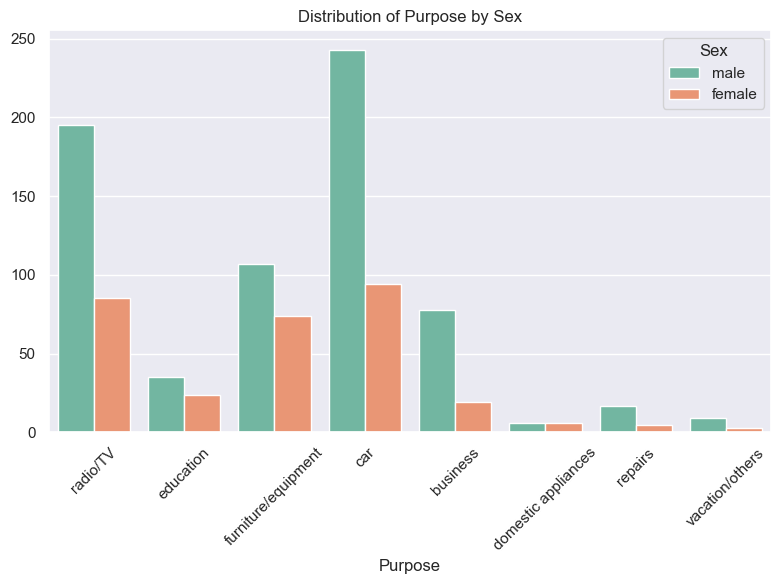

In [66]:

# Create the grouped bar plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Purpose', hue='Sex', data=germancreditdata, palette='Set2')
plt.title('Distribution of Purpose by Sex')
plt.xlabel('Purpose')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

Saving accounts & checking account by Risk

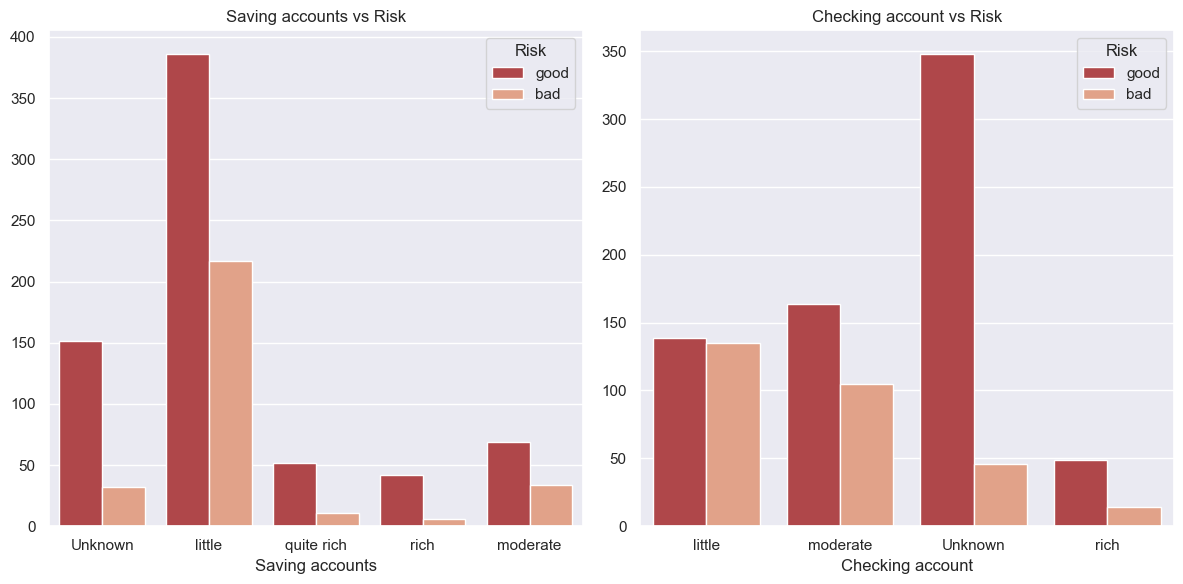

In [67]:
# Create a figure and axes with a grid layout
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Set the palette to "pink"
sns.set_palette("RdBu")

# Plot countplots for 'Saving accounts' and 'Checking account'
sns.countplot(x='Saving accounts', hue='Risk', data=germancreditdata, ax=axes[0])
axes[0].set_title('Saving accounts vs Risk')
axes[0].set_ylabel('')  # Remove y-axis label

sns.countplot(x='Checking account', hue='Risk', data=germancreditdata, ax=axes[1])
axes[1].set_title('Checking account vs Risk')
axes[1].set_ylabel('')  # Remove y-axis label

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


'Purpose' vs 'Risk'

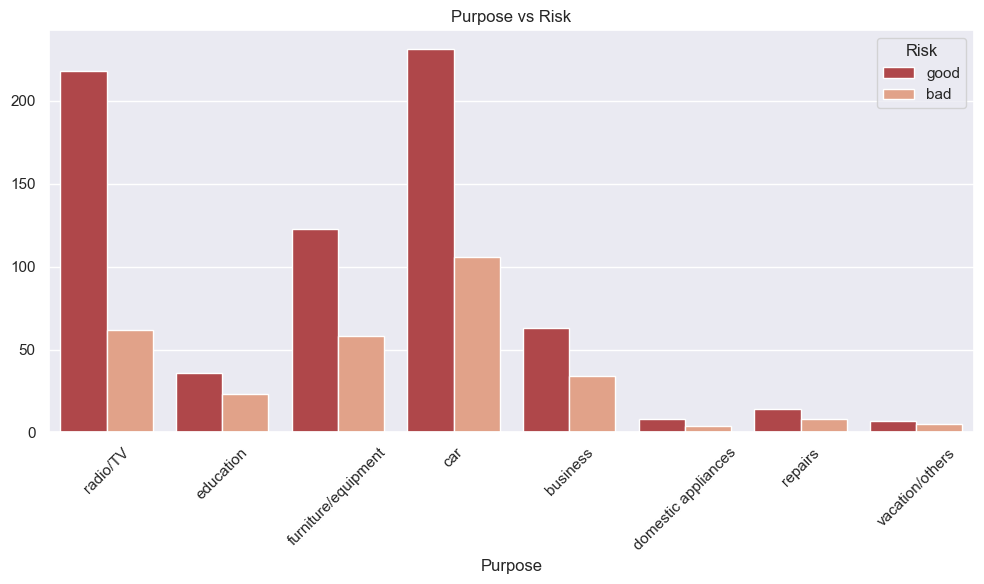

In [68]:
# Create a stacked bar chart for 'Purpose' vs 'Risk'
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Purpose', hue='Risk', data=germancreditdata)
plt.title('Purpose vs Risk')
plt.xlabel('Purpose')
plt.ylabel('')  # Remove y-axis label
plt.xticks(rotation=45)
plt.legend(title='Risk', loc='upper right')
plt.tight_layout()
plt.show()


Housing vs Risk

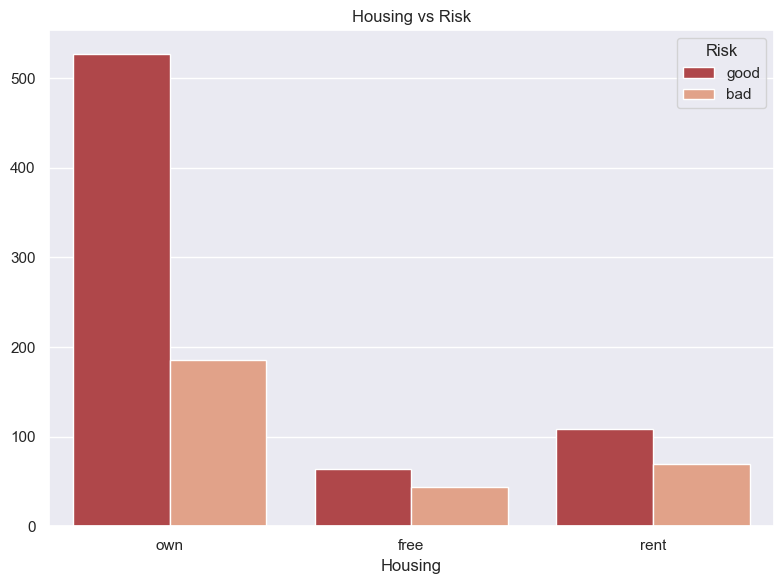

In [69]:
# Create a grouped bar chart for 'Housing' vs 'Risk'
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Housing', hue='Risk', data=germancreditdata)
plt.title('Housing vs Risk')
plt.xlabel('Housing')
plt.ylabel('')  # Remove y-axis label
plt.legend(title='Risk', loc='upper right')
plt.tight_layout()
plt.show()


Heatmap: To shows correlations between variables before preprocessing where:

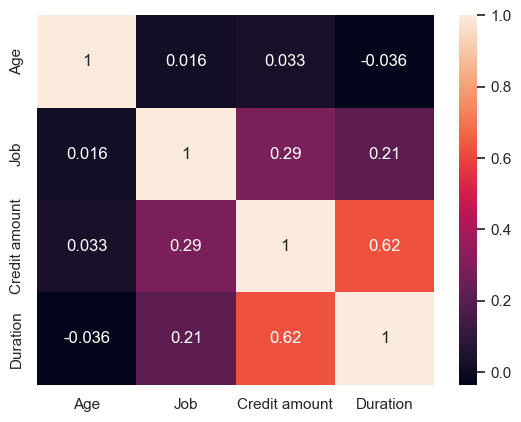

In [70]:

# Heatmap to show correlations

numeric_columns = germancreditdata.select_dtypes(include=np.number)
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


Credit count and Duration have high correlation, whereas credit amount duration have low correlation with job

### Data Preprocessing

This step includes;

1. Addressing missing values

2. Encoding categorical values

**Missing Values**

As shown below:

- Saving accounts
- Checking account

variables have 20% and 40% missing data in their columns, respectively.

In [71]:
print(germancreditdata['Saving accounts'].value_counts())
print(germancreditdata['Checking account'].value_counts())

Saving accounts
little        603
Unknown       183
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64
Checking account
Unknown     394
little      274
moderate    269
rich         63
Name: count, dtype: int64


How: Use Imputation with Mode

In [72]:
# Filling NaN values with the mode (most frequent category)

germancreditdata['Saving accounts'].fillna(germancreditdata['Saving accounts'].mode()[0], inplace=True)
germancreditdata['Checking account'].fillna(germancreditdata['Checking account'].mode()[0], inplace=True)

In [73]:
# Creating a dataframe indicating whether values are missing
germancreditdata1 = germancreditdata.isnull()

# Calculating the correlation between missingness of different columns
corr = germancreditdata1.corr()

print(corr)

                   Age  Sex  Job  Housing  Saving accounts  Checking account   
Age                NaN  NaN  NaN      NaN              NaN               NaN  \
Sex                NaN  NaN  NaN      NaN              NaN               NaN   
Job                NaN  NaN  NaN      NaN              NaN               NaN   
Housing            NaN  NaN  NaN      NaN              NaN               NaN   
Saving accounts    NaN  NaN  NaN      NaN              NaN               NaN   
Checking account   NaN  NaN  NaN      NaN              NaN               NaN   
Credit amount      NaN  NaN  NaN      NaN              NaN               NaN   
Duration           NaN  NaN  NaN      NaN              NaN               NaN   
Purpose            NaN  NaN  NaN      NaN              NaN               NaN   
Risk               NaN  NaN  NaN      NaN              NaN               NaN   
Duration Category  NaN  NaN  NaN      NaN              NaN               NaN   

                   Credit amount  Durat

### Further Data Preprocessing

Log-Scaling of the numerical columns:

In [74]:
germancreditdata

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Duration Category
0,67,male,2,own,Unknown,little,1169,6,radio/TV,good,0-12
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,37-48
2,49,male,1,own,little,Unknown,2096,12,education,good,0-12
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,37-48
4,53,male,2,free,little,little,4870,24,car,bad,13-24
...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,Unknown,1736,12,furniture/equipment,good,0-12
996,40,male,3,own,little,little,3857,30,car,good,25-36
997,38,male,2,own,little,Unknown,804,12,radio/TV,good,0-12
998,23,male,2,free,little,little,1845,45,radio/TV,bad,37-48


In [75]:


# List of numerical columns to be log transformed
numerical_columns = ['Age', 'Credit amount', 'Duration']

# Apply log(1 + x) transformation to all numerical columns
for col in numerical_columns:
    germancreditdata[col] = np.log1p(germancreditdata[col])

# Print the new DataFrame to verify
print(germancreditdata.head())


        Age     Sex  Job Housing Saving accounts Checking account   
0  4.219508    male    2     own         Unknown           little  \
1  3.135494  female    2     own          little         moderate   
2  3.912023    male    1     own          little          Unknown   
3  3.828641    male    2    free          little           little   
4  3.988984    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk Duration Category  
0       7.064759  1.945910             radio/TV  good              0-12  
1       8.691483  3.891820             radio/TV   bad             37-48  
2       7.648263  2.564949            education  good              0-12  
3       8.972464  3.761200  furniture/equipment  good             37-48  
4       8.491055  3.218876                  car   bad             13-24  


Use: One-hot Encoding to make the categorical variables suitable for all Machine Learning Models

In [76]:
# List of categorical columns to be one-hot encoded
categorical_columns = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

# Perform one-hot encoding
germancreditdata_encoded = pd.get_dummies(germancreditdata, columns=categorical_columns)

# Print the new DataFrame to verify
germancreditdata_encoded.head()

,Age,Credit amount,Duration,Duration Category,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good
0,4.219508,7.064759,1.945910,0-12,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
1,3.135494,8.691483,3.891820,37-48,True,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,3.912023,7.648263,2.564949,0-12,False,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
3,3.828641,8.972464,3.761200,37-48,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
4,3.988984,8.491055,3.218876,13-24,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False


In [77]:
germancreditdata_encoded.columns

Index(['Age', 'Credit amount', 'Duration', 'Duration Category', 'Sex_female',
       'Sex_male', 'Job_0', 'Job_1', 'Job_2', 'Job_3', 'Housing_free',
       'Housing_own', 'Housing_rent', 'Saving accounts_Unknown',
       'Saving accounts_little', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_Unknown', 'Checking account_little',
       'Checking account_moderate', 'Checking account_rich',
       'Purpose_business', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others', 'Risk_bad', 'Risk_good'],
      dtype='object')

In [78]:
binary_columns = ['Sex_female', 'Sex_male', 'Job_0', 'Job_1', 'Job_2', 'Job_3',
                  'Housing_free', 'Housing_own', 'Housing_rent',
                  'Saving accounts_Unknown', 'Saving accounts_little', 'Saving accounts_moderate',
                  'Saving accounts_quite rich', 'Saving accounts_rich',
                  'Checking account_Unknown', 'Checking account_little', 'Checking account_moderate',
                  'Checking account_rich', 'Purpose_business', 'Purpose_car',
                  'Purpose_domestic appliances', 'Purpose_education', 'Purpose_furniture/equipment',
                  'Purpose_radio/TV', 'Purpose_repairs', 'Purpose_vacation/others',
                  'Risk_bad', 'Risk_good']

germancreditdata_encoded[binary_columns] = germancreditdata_encoded[binary_columns].replace({False: 0, True: 1})


In [79]:
germancreditdata_encoded

,Age,Credit amount,Duration,Duration Category,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good
0,4.219508,7.064759,1.945910,0-12,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,3.135494,8.691483,3.891820,37-48,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3.912023,7.648263,2.564949,0-12,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,3.828641,8.972464,3.761200,37-48,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,3.988984,8.491055,3.218876,13-24,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.465736,7.459915,2.564949,0-12,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
996,3.713572,8.257904,3.433987,25-36,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
997,3.663562,6.690842,2.564949,0-12,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
998,3.178054,7.520776,3.828641,37-48,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


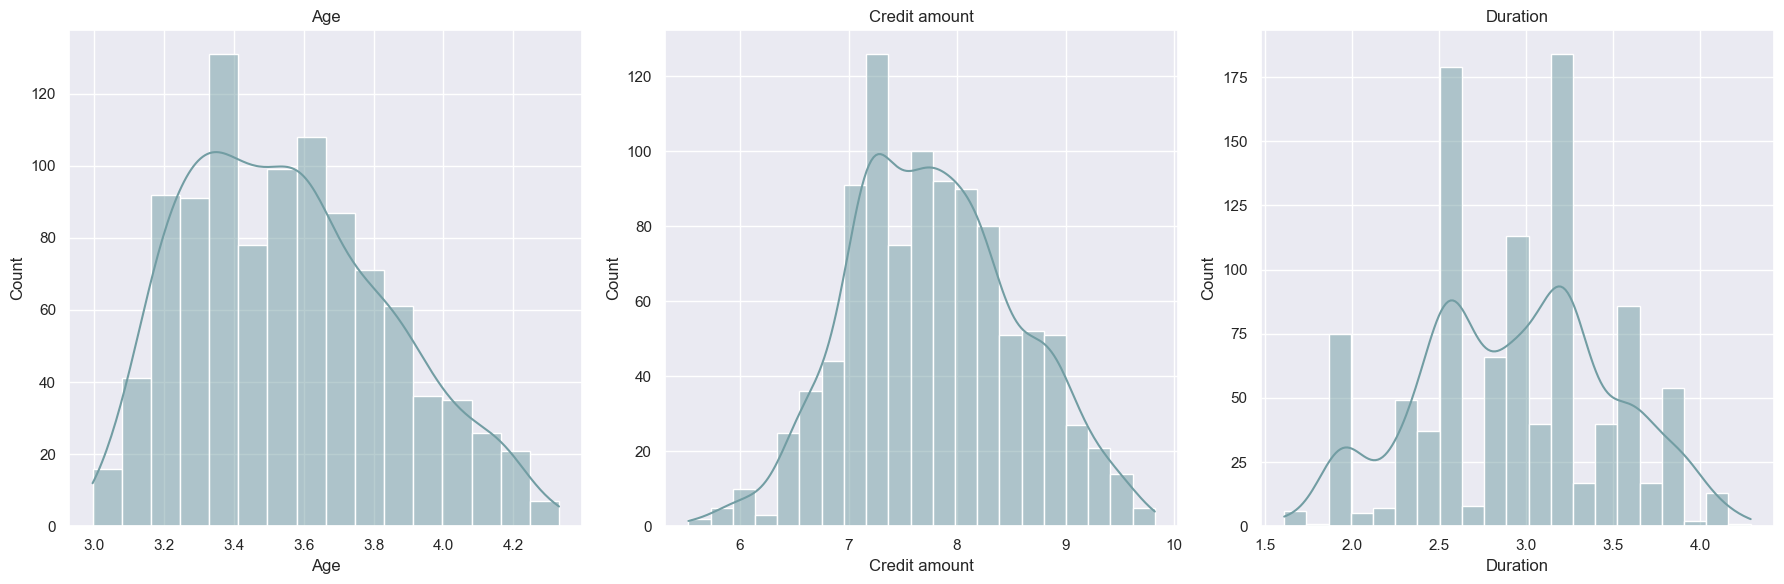

In [80]:
# List of numerical columns
numerical_columns = ['Age', 'Credit amount', 'Duration']

# Number of columns for the subplot grid
num_cols = 3

# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=num_cols, figsize=(18, 6))

# Draw a histogram and KDE for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(germancreditdata_encoded[col], kde=True, color="#729da3", ax=axs[i])
    axs[i].set_title(col)

# Display the figure with subplots
plt.tight_layout()
plt.show()

To further eliminate the difference in numerical scales of "Initially numerical columns", Standardization will be applied as well.

In [81]:
germancreditdata_excluded = germancreditdata_encoded.iloc[:, :]
germancreditdata_excluded.head()

,Age,Credit amount,Duration,Duration Category,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good
0,4.219508,7.064759,1.945910,0-12,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,3.135494,8.691483,3.891820,37-48,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3.912023,7.648263,2.564949,0-12,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,3.828641,8.972464,3.761200,37-48,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,3.988984,8.491055,3.218876,13-24,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [82]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the DataFrame
germancreditdata_encoded_copy = germancreditdata_excluded.copy()

# List of numerical columns
numerical_columns = ['Age', 'Credit amount', 'Duration']

# Create a scaler object
scaler = StandardScaler()

# Apply the scaler only to the numerical columns of the DataFrame copy
germancreditdata_encoded_copy[numerical_columns] = scaler.fit_transform(germancreditdata_encoded_copy[numerical_columns])

# Print the new DataFrame to verify
print(germancreditdata_encoded_copy.head())

        Age  Credit amount  Duration Duration Category  Sex_female  Sex_male   
0  2.282879      -0.933992 -1.822056              0-12           0         1  \
1 -1.438777       1.163149  1.741206             37-48           1         0   
2  1.227217      -0.181750 -0.688500              0-12           0         1   
3  0.940950       1.525385  1.502020             37-48           0         1   
4  1.491441       0.904761  0.508940             13-24           0         1   

   Job_0  Job_1  Job_2  Job_3  ...  Purpose_business  Purpose_car   
0      0      0      1      0  ...                 0            0  \
1      0      0      1      0  ...                 0            0   
2      0      1      0      0  ...                 0            0   
3      0      0      1      0  ...                 0            0   
4      0      0      1      0  ...                 0            1   

   Purpose_domestic appliances  Purpose_education   
0                            0                  0  

### Train and Test

Clustering by numerical data can help train our Machine Learning models.

Check out, we search a plausible k hyperparameter for k-means clustering method, via Elbow Method.

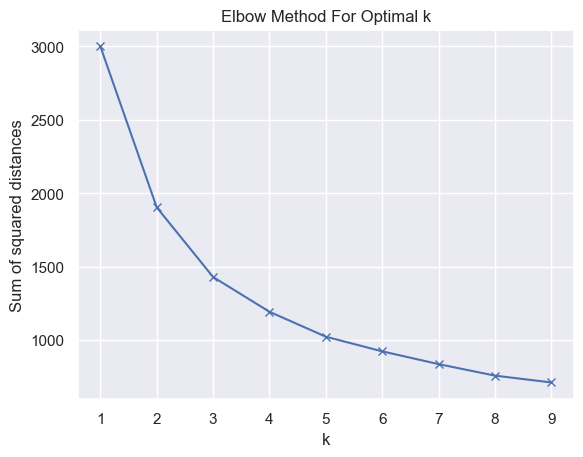

In [83]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract only the numerical columns for k-means clustering
numerical_data = germancreditdata_encoded_copy[numerical_columns]

# Calculate sum of squared distances
ssd = []
K = range(1,10)  # Check for up to 10 clusters
for k in K:
    km = KMeans(n_clusters=k, n_init = 10)
    km = km.fit(numerical_data)
    ssd.append(km.inertia_)  # Sum of squared distances

# Plot sum of squared distances / Inertia
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

K=3 look to be a good candidate, also considering the dimensionality of the columns

In [84]:
from sklearn.cluster import KMeans

# Define the number of clusters
n_clusters = 3

# Create a k-means object and fit it to the numerical data
km = KMeans(n_clusters=n_clusters, random_state=0, n_init = 10)
clusters = km.fit_predict(germancreditdata_encoded_copy[numerical_columns])

**3D graph of clusters**

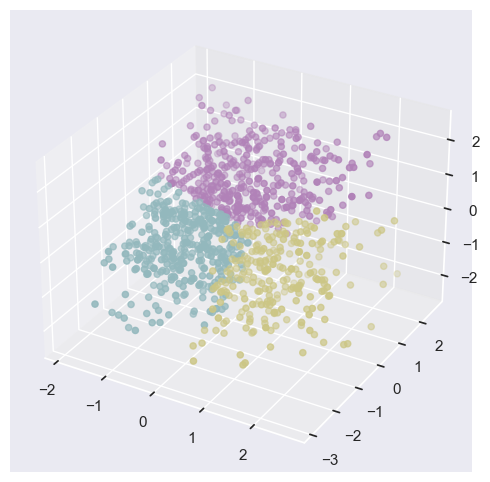

In [85]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for each data point
colors = ['#b182b8', '#93b8bd', '#ccc685']

# Plot each cluster with specific colors
for i in range(n_clusters):
    ax.scatter(germancreditdata_encoded_copy.loc[clusters == i, 'Age'],
               germancreditdata_encoded_copy.loc[clusters == i, 'Credit amount'],
               germancreditdata_encoded_copy.loc[clusters == i, 'Duration'],
               c=colors[i])  # Assign specific color to each cluster

plt.show()

Despite the failure of clustering for Duration & Credit Amount pairs;

Age & Credit Amount and Age & Duration pairs yielded visually distinct clusters.

This shows the success of clustering via Age.

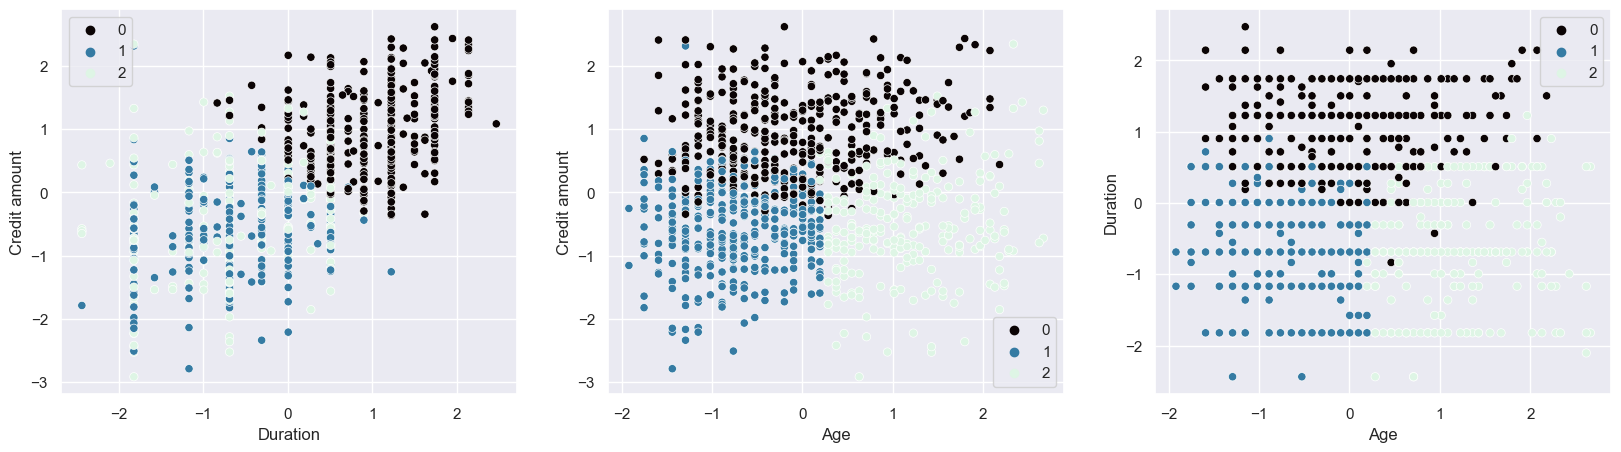

In [86]:
fig, ax  = plt.subplots(1,3,figsize=(20,5))

sns.scatterplot(x='Duration', y='Credit amount', hue=clusters, data=germancreditdata_encoded_copy, ax=ax[0], palette='mako')
sns.scatterplot(x='Age', y='Credit amount', hue=clusters, data=germancreditdata_encoded_copy, ax=ax[1], palette='mako')
sns.scatterplot(x='Age', y='Duration', hue=clusters, data=germancreditdata_encoded_copy, ax=ax[2], palette='mako')

plt.show()

In [87]:
# the cluster labels as a new column to thhe DataFrame
germancreditdata_encoded_copy['cluster'] = clusters

In [88]:
germancreditdata_encoded_copy.groupby('cluster')[numerical_columns].mean()

,Age,Credit amount,Duration
cluster,,,
0,-0.098476,0.933668,0.931276
1,-0.701919,-0.589236,-0.533619
2,1.158361,-0.512401,-0.589290


The success of clustering by age (reverted back to original un-preprocessed form) is present below.

In [89]:
# Add the cluster labels to your original DataFrame
germancreditdata['cluster'] = clusters

# Perform groupby operation on the original DataFrame
germancreditdata.groupby('cluster')[numerical_columns].mean()

,Age,Credit amount,Duration
cluster,,,
0,3.525886,8.513477,3.449515
1,3.350120,7.332181,2.649531
2,3.891967,7.391782,2.619128


In [90]:
# Add the cluster labels to your original DataFrame
germancreditdata['cluster'] = clusters

# Perform groupby operation on the original DataFrame
grouped_data = germancreditdata.groupby('cluster')

# Perform desired operations on the grouped data
# For example, calculating the mean of numerical columns
mean_values = grouped_data[numerical_columns].mean()

# Print the mean values
print(mean_values)


              Age  Credit amount  Duration
cluster                                   
0        3.525886       8.513477  3.449515
1        3.350120       7.332181  2.649531
2        3.891967       7.391782  2.619128


**Machine Learning**

In [91]:
#the current form of the preprocessed dataframe is:

germancreditdata_final = germancreditdata_encoded_copy.copy()
germancreditdata_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Age                          1000 non-null   float64 
 1   Credit amount                1000 non-null   float64 
 2   Duration                     1000 non-null   float64 
 3   Duration Category            1000 non-null   category
 4   Sex_female                   1000 non-null   int64   
 5   Sex_male                     1000 non-null   int64   
 6   Job_0                        1000 non-null   int64   
 7   Job_1                        1000 non-null   int64   
 8   Job_2                        1000 non-null   int64   
 9   Job_3                        1000 non-null   int64   
 10  Housing_free                 1000 non-null   int64   
 11  Housing_own                  1000 non-null   int64   
 12  Housing_rent                 1000 non-null   int64   
 13  Savi

**K-Nearest Neighbors (KNN)**

k-NN was implemented with hyperparameter tuning for the k values.

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [103]:
print(germancreditdata_final.columns)

Index(['Age', 'Credit amount', 'Duration', 'Sex_female', 'Sex_male', 'Job_0',
       'Job_1', 'Job_2', 'Job_3', 'Housing_free', 'Housing_own',
       'Housing_rent', 'Saving accounts_Unknown', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_Unknown',
       'Checking account_little', 'Checking account_moderate',
       'Checking account_rich', 'Purpose_business', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Risk_bad', 'Risk_good', 'cluster'],
      dtype='object')


In [104]:
X = germancreditdata_final.drop(['Risk_good', 'Risk_bad'], axis=1)  # drop the target variable and the 'Risk_bad' column
y = germancreditdata_final['Risk_good']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn = KNeighborsClassifier()

parameters = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],  # Example values, you can choose others
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 is manhattan_distance and 2 is euclidean_distance
}

In [105]:
grid_search = GridSearchCV(estimator=knn, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}


In [106]:
best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.34      0.45        59
           1       0.77      0.93      0.84       141

    accuracy                           0.76       200
   macro avg       0.72      0.63      0.65       200
weighted avg       0.74      0.76      0.73       200

Accuracy Score: 0.755
